<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw02-2/hw02-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from requests import get

dates=['20180114','20200109']
stns=['47918','47909','47945']

for stn in stns:
  for date in dates:
    yr=date[0:4]
    mo=date[4:6]
    da=date[6:8]+'00'
    if stn=='47909' and date=='20200109':
      da=date[6:8]+'12'
    
    url='https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR='+yr\
            +'&MONTH='+mo+'&FROM='+da+'&TO='+da+'&STNM='+stn
    print(url)
  
    web=get(url,verify=False)
    a=web.text.splitlines()

    m=0
    with open(stn+'_'+date+'.txt','w') as f:
      for i in range(0,len(a)):
        if a[i][0:10]=='----------':
          m=1
        if a[i]=='</PRE><H3>Station information and sounding indices</H3><PRE>':
          m=0
        if m==1:
          #print(a[i])
          f.write(a[i]+'\n')

! rm -rf Machine-Learning-in-Atmospheric-Thermodynamics
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git 

https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47918


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0900&TO=0900&STNM=47918


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47909


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0912&TO=0912&STNM=47909


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2018&MONTH=01&FROM=1400&TO=1400&STNM=47945


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2020&MONTH=01&FROM=0900&TO=0900&STNM=47945


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Cloning into 'Machine-Learning-in-Atmospheric-Thermodynamics'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 290 (delta 85), reused 191 (delta 43), pack-reused 32
Receiving objects: 100% (290/290), 177.71 MiB | 35.37 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [117]:
import numpy as np
import subprocess
import os




8.0 80.0
-4.053031015562038 -0.7146587216918181


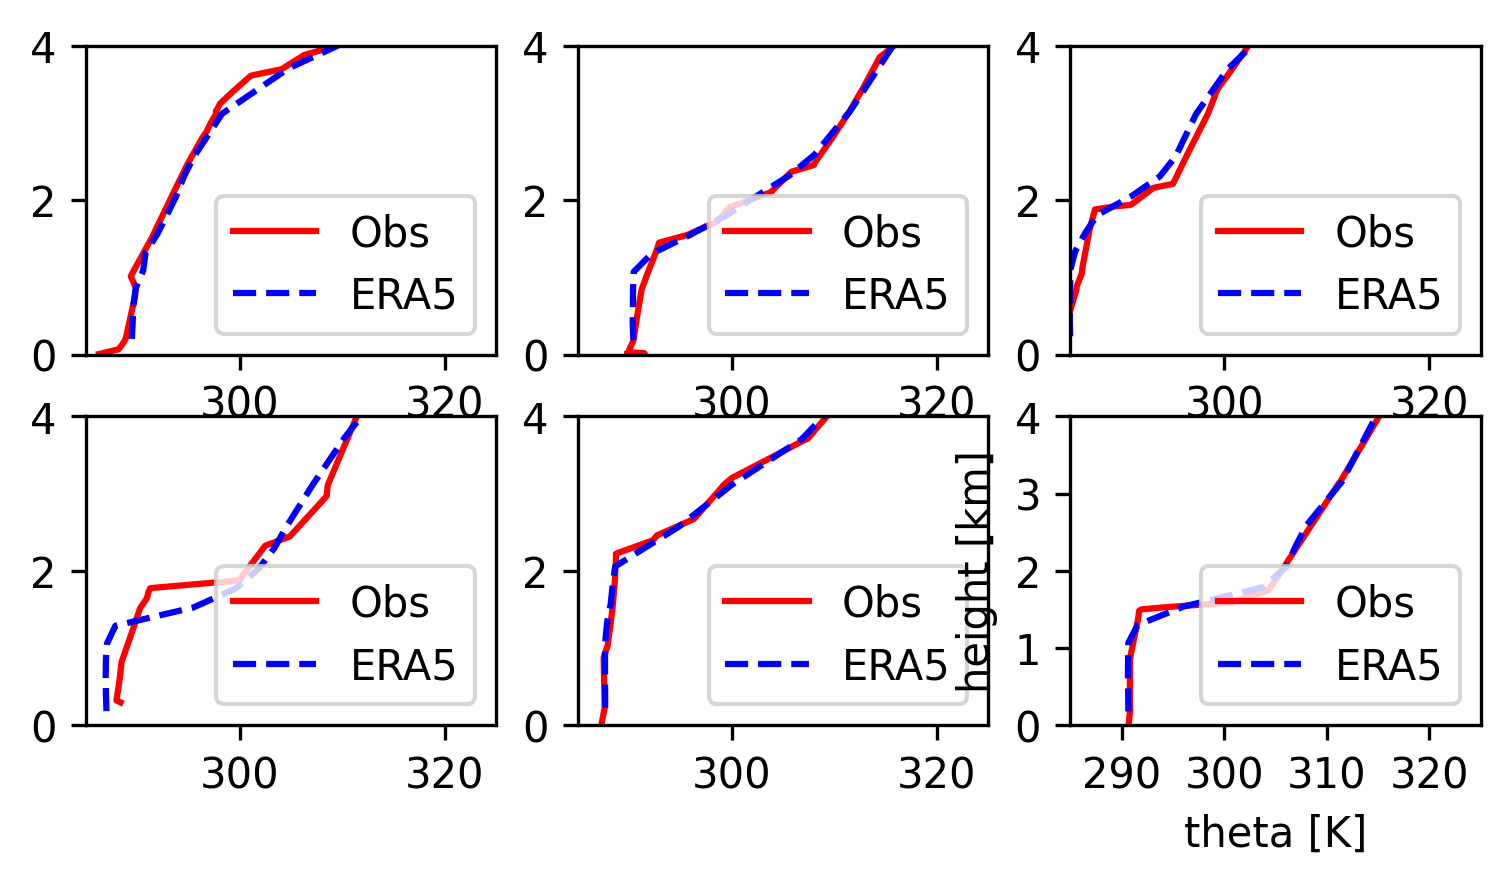

In [128]:
import numpy as np
import matplotlib.pyplot as plt

path='Machine-Learning-in-Atmospheric-Thermodynamics/hw02-2/data/'
dates=['20180114','20200109']
stns=['47918','47909','47945']

fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(6,3),dpi=300)
ax=ax.flatten()
n=0
for stn in stns:
  for date in dates:
    filen=path+'/era5_'+stn+'_'+date+'.dat'
    era5=np.fromfile(filen,dtype=np.float32).reshape(5,27)

    filen=stn+'_'+date+'.txt'
    cat='cat '+filen+'| wc -l'
    nz=np.int64(subprocess.check_output(cat,shell=True))-4

    p = np.zeros(nz)
    z = np.zeros(nz)
    t = np.zeros(nz)
    th = np.zeros(nz)
    q = np.zeros(nz)
    u = np.zeros(nz)
    v = np.zeros(nz)

    f = open(filen,'r')
    mpf = f.readlines()
    f.close()

    del mpf[0:4]
    for i in range(0,nz):
      if mpf[0][0:7]!='       ':
        p[i] = mpf[0][0:7]
      else:
        p[i] = np.nan
  
      if mpf[0][8:15]!='       ':
        z[i] = mpf[0][8:15]
      else:
        z[i] = np.nan

      if mpf[0][16:22]!='      ':
        t[i] = mpf[0][16:22]
      else:
        t[i] = np.nan

      if mpf[0][58:64]!='      ':
        th[i] = mpf[0][58:64]
      else:
        th[i] = np.nan

      if mpf[0][31:36]!='     ':
        q[i] = mpf[0][31:36]
      else:
        q[i] = np.nan

      if mpf[0][51:57]!='      ':
        u[i] = mpf[0][51:57]
      else:
        u[i] = np.nan

      if mpf[0][44:50]!='      ':
        v[i] = mpf[0][44:50]
      else:
        v[i] = np.nan

      del mpf[0]


    t=t+273.15
    es=np.exp(-6096.9385/t+16.635794-2.711193*t/1.0e2+1.673952/1.0e5*t*t+2.433502*np.log(t))
    q=0.622*es/(p)*q/100.

    a=u*0.514444444
    b=(270.-v)*np.pi/180.
    u=a*np.cos(b)
    v=a*np.sin(b)

    ax[n].plot(th,z/1000.,'r',era5[1,:],era5[0,:]/1000.,'b--')
    ax[n].set_ylim([0,4.])
    ax[n].set_xlim([285.,325.])
    plt.xticks(ticks=np.arange(290,321,10))
    plt.yticks(ticks=np.arange(0,4.1,1))
    plt.xlabel('theta [K]')
    plt.ylabel('height [km]')
    ax[n].legend(['Obs','ERA5'])

    n=n+1